# Visualisation de données avec pandas et matplotlib

##### Germain Salvato Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

Ce notebook présente l'utilisation de [`pandas`](http://pandas.pydata.org/) et 
de [`matplotlib`](http://matplotlib.org/) pour la lecture de données en python 
et la constructions de quelques représentations graphiques avec matplotlib.
Les données utilisées dans cet exemple sont issues de la base de données ouverte de 
la Communauté d'Agglomération de Pau-Pyrénées (CAPP) [opendata.agglo-pau.fr](opendata.agglo-pau.fr). 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Chargement des données à partir d'un fichier CSV

Les données proviennent de http://opendata.agglo-pau.fr/index.php/fiche?idQ=27

Lors du téléchargement de l'archive, le fichier csv contient les données et un fichiers excel décrit le contenu de chaque colonne.

Ici, le fichier csv est lu directement avec la fonction `read_csv` de pandas, en précisant que le séparateur est un point virgule. Cette fonction retourne un objet `DataFrame` qui s'apparente à un tableau de données. On précise également que `LIBGEO`, le nom de la commune, sera utilisé comme index de la `DataFrame` de pandas. Chaque ligne portera alors le nom de la ville correspondante.

In [2]:
df = pd.read_csv("Evolution_et_structure_de_la_population/Evolution_structure_population.csv", sep=";")
df = df.set_index("libgeo")
df

,ccodgeo,reg,dep,arr,cv,ze2010,id_modif_geo,p11_pop,p99_pop,d90_pop,...,c10_pop55p,c10_pop55p_cs1,c10_pop55p_cs2,c10_pop55p_cs3,c10_pop55p_cs4,c10_pop55p_cs5,c10_pop55p_cs6,c10_pop55p_cs7,c10_pop55p_cs8,evol99_11
libgeo,,,,,,,,,,,,,,,,,,,,,
ARTIGUELOUTAN,64059,72,64,643,6431,7214,ZZZZZZ,944,722.0,669,...,256,8,4,8,12,16,12,180,16,30.747922
BILLERE,64129,72,64,643,6451,7214,ZZZZZZ,13343,13390.0,12570,...,4245,9,47,188,185,289,101,3150,276,-0.351008
BIZANOS,64132,72,64,643,6447,7214,ZZZZZZ,4773,4674.0,4298,...,1754,0,40,124,80,52,44,1337,76,2.118100
GAN,64230,72,64,643,6446,7214,ZZZZZZ,5481,4961.0,4724,...,1890,12,55,95,103,69,40,1411,106,10.481758
GELOS,64237,72,64,643,6448,7214,ZZZZZZ,3620,3665.0,3529,...,1262,8,24,36,56,72,45,917,104,-1.227831
IDRON,64269,72,64,643,6431,7214,ZZZZZZ,4091,5151.0,2311,...,1144,0,38,100,96,59,13,763,75,-20.578528
JURANCON,64284,72,64,643,6446,7214,ZZZZZZ,7037,7381.0,7538,...,2494,0,44,104,164,124,96,1744,217,-4.660615
LEE,64329,72,64,643,6431,7214,ZZZZZZ,1213,779.0,446,...,300,0,4,51,16,8,4,199,20,55.712452
LESCAR,64335,72,64,643,6419,7214,ZZZZZZ,10030,8191.0,5793,...,2733,12,54,207,120,107,87,1912,233,22.451471


## Un diagramme en barres

Premièrement nous allons construire un graphique sous forme de barres horizontales, représentant la population dans chaque ville de l'aglomération de Pau-Pyrénées en 2011.

Nous utiliserons un diagramme en barre horizontale avec la fonction `barh` de matplotlib ([exemple](http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html)).

Commençons par extraire la colonne qui nous intéresse (`P11_POP`) et classons les valeurs par ordre croissant.

In [3]:
pop11 = df["p11_pop"]
pop11 = pop11.sort_values(ascending=True)
pop11

libgeo
SENDETS             873
ARTIGUELOUTAN       944
LEE                1213
OUSSE              1554
MAZERES-LEZONS     1921
GELOS              3620
IDRON              4091
BIZANOS            4773
GAN                5481
JURANCON           7037
LESCAR            10030
LONS              12304
BILLERE           13343
PAU               79798
Name: p11_pop, dtype: int64

Construisons maintenant le graphique avec les données ci-dessus. 

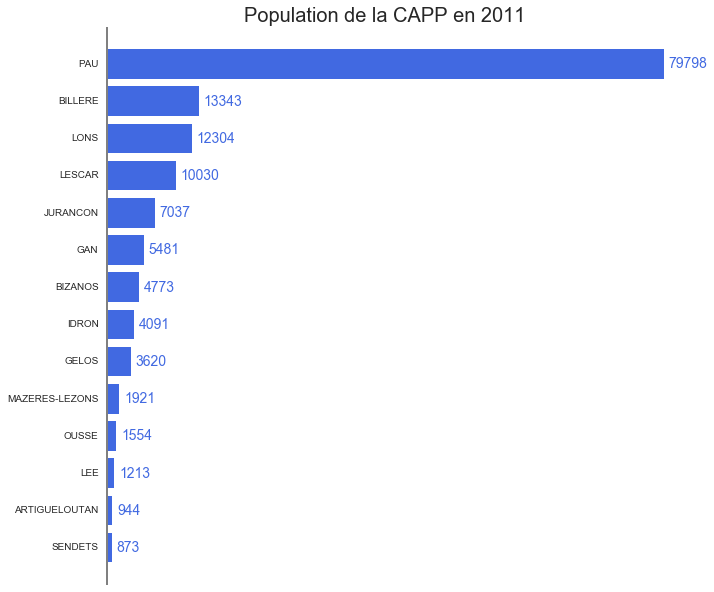

In [4]:
# figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("Population de la CAPP en 2011", fontsize=20)
# bar plot
ax.barh(
    # position et longueur des barres
    bottom=range(pop11.count()), 
    width=pop11,
    # labels
    align="center", 
    tick_label=pop11.index,
    # couleurs et traits
    color="RoyalBlue",
    linewidth=0
)
# format axis
ax.set_frame_on(False)
ax.set_xticks([])
ax.tick_params("both", length=0)
ax.vlines(0, -1, pop11.count(), color="gray", linewidth=4)
# add the value at the end of the bar
for y, pop in enumerate(pop11):
    ax.annotate(
        # texte
        "%.0f" % pop,
        # position
        xy=(pop, y), 
        xytext=(5, -4), 
        textcoords="offset points", 
        # format
        fontsize=14, 
        color="RoyalBlue"
    )
fig.savefig("barh_pop.png", dpi=300)

## Réalisation d'une Treemap

Pour faire ce graphique on va utiliser la librairie [`squarify`](https://pypi.python.org/pypi/python3-squarify/0.1.5). La superficie des rectangles représentera la superficie de la commune. Une échelle de couleur donnera la population de la commune.

In [5]:
import squarify

Extraction de la superficie des communes et de la population en 2011. Le tableau est trié par ordre décroissant de la superficie.

In [6]:
df2 = df[["superf", "p11_pop"]]
df2 = df2.sort_values(by="superf", ascending=False)
df2

,superf,p11_pop
libgeo,,
GAN,40,5481
PAU,32,79798
LESCAR,27,10030
JURANCON,19,7037
LONS,12,12304
GELOS,11,3620
ARTIGUELOUTAN,8,944
IDRON,8,4091
SENDETS,8,873


Superficie et population de Pau :

In [7]:
print("Pau: superficie = %d km2, population = %d\n" % (df2["superf"]["PAU"], df2["p11_pop"]["PAU"]))

Pau: superficie = 32 km2, population = 79798



Représentation en Treemaps avec les fonctions inclues dans [`squarify`](https://pypi.python.org/pypi/python3-squarify/0.1.5).

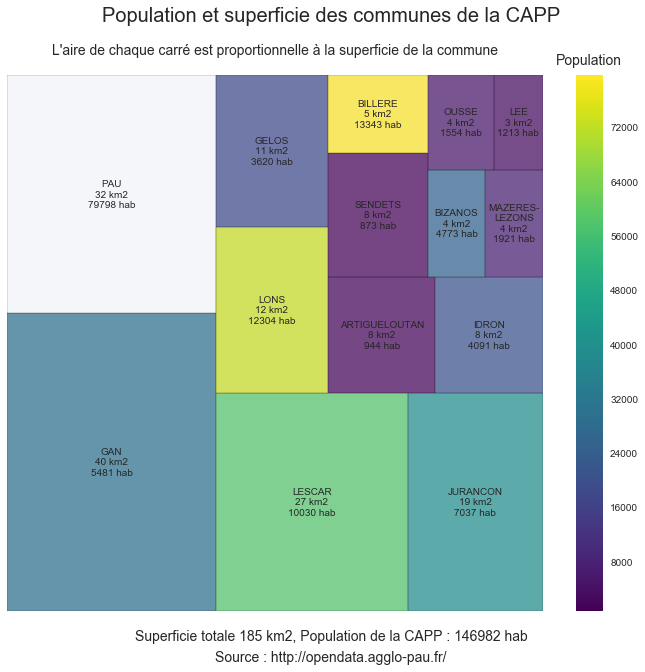

In [8]:
x = 0.
y = 0.
width = 100.
height = 100.
cmap = matplotlib.cm.viridis

# color scale on the population
# min and max values without Pau
mini, maxi = df2.drop("PAU").p11_pop.min(), df2.drop("PAU").p11_pop.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df2.p11_pop]
colors[1] = "#FBFCFE"

# labels for squares
labels = ["%s\n%d km2\n%d hab" % (label) for label in zip(df2.index, df2.superf, df2.p11_pop)]
labels[11] = "MAZERES-\nLEZONS\n%d km2\n%d hab" % (df2["superf"]["MAZERES-LEZONS"], df2["p11_pop"]["MAZERES-LEZONS"])

# make plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Population et superficie des communes de la CAPP", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(df2.superf, color=colors, label=labels, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("L'aire de chaque carré est proportionnelle à la superficie de la commune\n", fontsize=14)

# color bar
# create dummy invisible image with a color map
img = plt.imshow([df2.p11_pop], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

fig.text(.76, .9, "Population", fontsize=14)
fig.text(.5, 0.1,
         "Superficie totale %d km2, Population de la CAPP : %d hab" % (df2.superf.sum(), df2.p11_pop.sum()),
         fontsize=14,
         ha="center")
fig.text(.5, 0.07,
         "Source : http://opendata.agglo-pau.fr/",
         fontsize=14,
         ha="center")

fig.savefig("treemap_capp_pau.png", dpi=300)

## Graphique xy classique

Dans ce graphique nous allons simplement représenter le nombre de naissances et de décés à Pau entre 1999 et 2011. C'est un graphique très simple à réaliser avec pandas. Nous allons voir tout d'abord comment extraire les données puis nous ferons un premier graphique basique avec la fonction `plot()` de pandas. Ensuite, nous ajouterons une courbe de tendance linéaire avec [`lineregress()`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) de scipy.

Tout d'abord nous devons extraire les colonnes `NAISXX` et `DECEXX` du tableau global pour la ligne concernant Pau.

In [9]:
# noms des colonnes:
years = [99] + list(range(0, 12))
naissance = ["nais%02d" % y for y in years]
deces = ["dece%02d" % y for y in years]

# nouvelle DataFrame avec les deces et les naissances à Pau en fonction des années
df4 = pd.DataFrame(
    data={
        "naissance": df.loc["PAU", naissance].values, 
        "deces": df.loc["PAU", deces].values
    },
    index=[1999 + i for i in range(0, 13)]
)
df4

,deces,naissance
1999,773,900
2000,744,981
2001,768,936
2002,759,897
2003,797,952
2004,772,932
2005,794,909
2006,784,984
2007,744,879
2008,774,906


À partir de ce type de tableau, il est très simple de tracer des courbes avec la fonction `plot()` de `pandas`. Les arguments sont du même type que ceux de matplotlib :

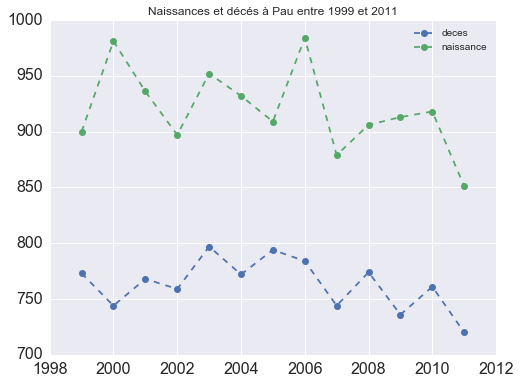

In [10]:
df4.plot(
    marker="o", 
    linestyle="dashed", 
    title="Naissances et décés à Pau entre 1999 et 2011",
    figsize=(8, 6),
    fontsize=16,
    xlim=(1998, 2012)
)

Ajoutons maintenant une courbe de tendance et ajoutons les données au tableau (bien que deux points seulement auraient suffit) :

In [11]:
from scipy.stats import linregress
# pour les naissances
p_naissance, i_naissance, *others = linregress(x=df4.index, y=df4.naissance)
df4["trend_naissance"] = p_naissance * df4.index + i_naissance
# pour les décés
p_deces, i_deces, *others  = linregress(x=df4.index, y=df4.deces)
df4["trend_deces"] = p_deces * df4.index + i_deces

df4

,deces,naissance,trend_naissance,trend_deces
1999,773,900,945.164835,777.054945
2000,744,981,940.945055,774.802198
2001,768,936,936.725275,772.549451
2002,759,897,932.505495,770.296703
2003,797,952,928.285714,768.043956
2004,772,932,924.065934,765.791209
2005,794,909,919.846154,763.538462
2006,784,984,915.626374,761.285714
2007,744,879,911.406593,759.032967
2008,774,906,907.186813,756.780220


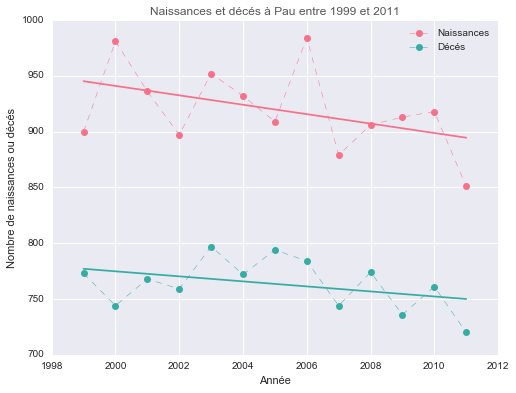

In [12]:
colors = sns.color_palette("husl", 2)
# figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_title("Naissances et décés à Pau entre 1999 et 2011", color="#555555")
# plot the differents quantities
ax.plot(df4.index, df4.naissance, marker="o", label="Naissances", linestyle="--", linewidth=.5, color=colors[0])
ax.plot(df4.index, df4.deces, marker="o", label="Décés", linestyle="--", linewidth=.5, color=colors[1])
ax.plot(df4.index, df4.trend_naissance, label="", color=colors[0])
ax.plot(df4.index, df4.trend_deces, label="", color=colors[1])
# format and style
ax.set_xlabel("Année")
ax.set_ylabel("Nombre de naissances ou décés")
ax.legend()
fig.savefig("xy_pop.png", dpi=300)

## Camembert ou pie chart ou wedge chart

Le fichiers de données de la CAPP contient aussi les catégorie socio-professionnelle pour chaque commune. Nous allons les représenter avec un diagramme de type camembert.

Commençons par regrouper les données dans une nouvelle table et faisons la somme sur toutes les communes.

In [13]:
columns = {
    "c10_pop15p_cs1": "agriculteurs",
    "c10_pop15p_cs2": "Artisans",
    "c10_pop15p_cs3": "Cadres",
    "c10_pop15p_cs4": "Intermédiaires",
    "c10_pop15p_cs5": "Employés",
    "c10_pop15p_cs6": "Ouvriers",
    "c10_pop15p_cs7": "Retraités",
    "c10_pop15p_cs8": "Autres"
}
df_cat = df[list(columns.keys())]
df_cat = df_cat.rename(columns=columns)
# add the sum over CAPP
df_cat.loc["CAPP"] = df_cat.sum(axis=0)
df_cat["total"] = df_cat.sum(axis=1)
df_cat

,Intermédiaires,Retraités,Autres,Employés,Cadres,agriculteurs,Ouvriers,Artisans,total
libgeo,,,,,,,,,
ARTIGUELOUTAN,164,184,80,140,40,24,72,20,724
BILLERE,1790,3178,1325,2270,908,18,1352,245,11086
BIZANOS,534,1337,578,622,446,0,401,132,4050
GAN,778,1415,450,658,393,36,406,209,4345
GELOS,483,921,491,498,246,20,293,127,3079
IDRON,554,763,587,436,507,4,193,159,3203
JURANCON,940,1761,900,932,428,16,755,183,5915
LEE,183,199,172,98,172,4,70,43,941
LESCAR,1342,1920,1408,1222,965,21,925,310,8113


Construction du graphique :

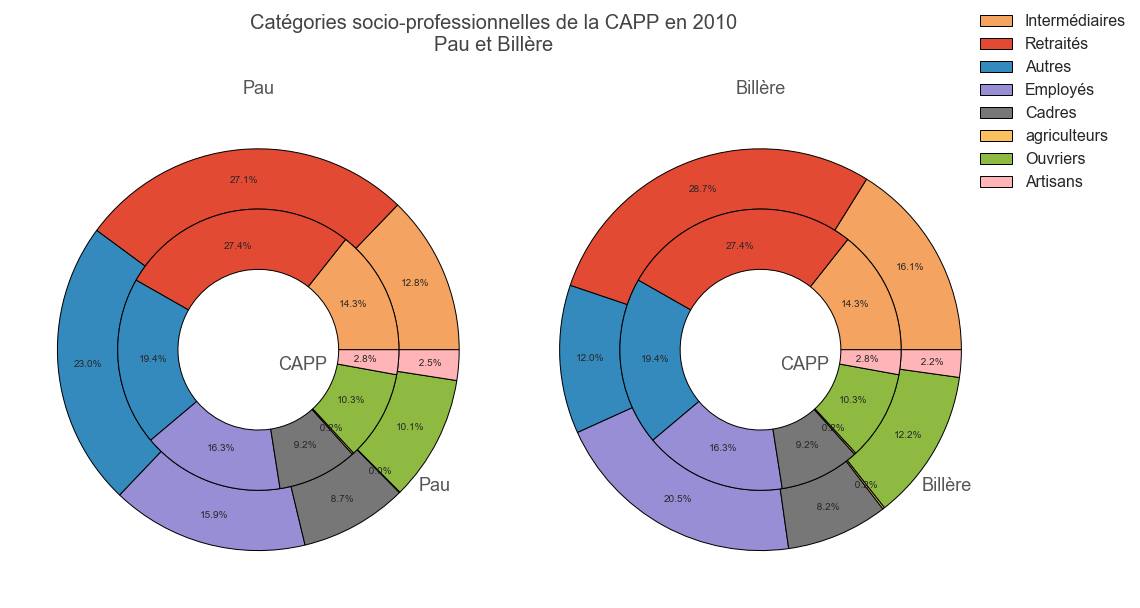

In [14]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle("Catégories socio-professionnelles de la CAPP en 2010\nPau et Billère", fontsize=20, color="#444444")
width = .3

# color scale
colors = ["#F4A460", '#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

# PAU et CAPP
ax1 = fig.add_subplot(121, aspect="equal")
pau_pie = ax1.pie(
    # data
    df_cat.loc["PAU"].drop("total"), 
    # wedges
    colors=colors, 
    radius=1, 
    wedgeprops={"width": width, "linewidth": 1},
    # labels
    autopct="%4.1f%%",
    pctdistance=.85
)
capp_pie = ax1.pie(
    df_cat.loc["CAPP"].drop("total"), 
    colors=colors, 
    radius=1 - width,
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.75
)
ax1.set_title("Pau", fontsize=18, color="#555555")
ax1.text(.1, -.1, "CAPP", fontsize=18, color='#555555')
ax1.text(.8, -.7, "Pau", size=18, color='#555555')

# Billere et CAPP
ax2 = fig.add_subplot(122, aspect="equal")
bill_pie = ax2.pie(
    df_cat.loc["BILLERE"].drop("total"), 
    colors=colors, 
    radius=1, 
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.85
)
capp_pie = ax2.pie(
    df_cat.loc["CAPP"].drop("total"), 
    colors=colors, 
    radius=1 - width,
    wedgeprops={"width": width, "linewidth": 1},
    autopct="%4.1f%%",
    pctdistance=.75
)
ax2.set_title("Billère", fontsize=18, color="#555555")
ax2.text(.1, -.1, "CAPP", size=18, color='#555555')
ax2.text(.8, -.7, "Billère", size=18, color='#555555')

# legende
fig.legend(pau_pie[0], df_cat.columns.values, fontsize=16)
fig.subplots_adjust(wspace=0)
fig.savefig("capp_pie.png", dpi=300)